<a href="https://colab.research.google.com/github/lafunes/Machine_Learning/blob/main/Hw_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from google.colab import drive
drive.mount('/content/gdrive')
os.chdir('/content/gdrive/My Drive/ML/Assignment 4')

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import log_loss
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

In [3]:
file_path1 = '/content/gdrive/My Drive/ML/Assignment 4/cancer.csv'
cancer = pd.DataFrame(pd.read_csv(file_path1))
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
file_path2 = '/content/gdrive/My Drive/ML/Assignment 4/Housing.csv'
Housing = pd.DataFrame(pd.read_csv(file_path2))
Housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


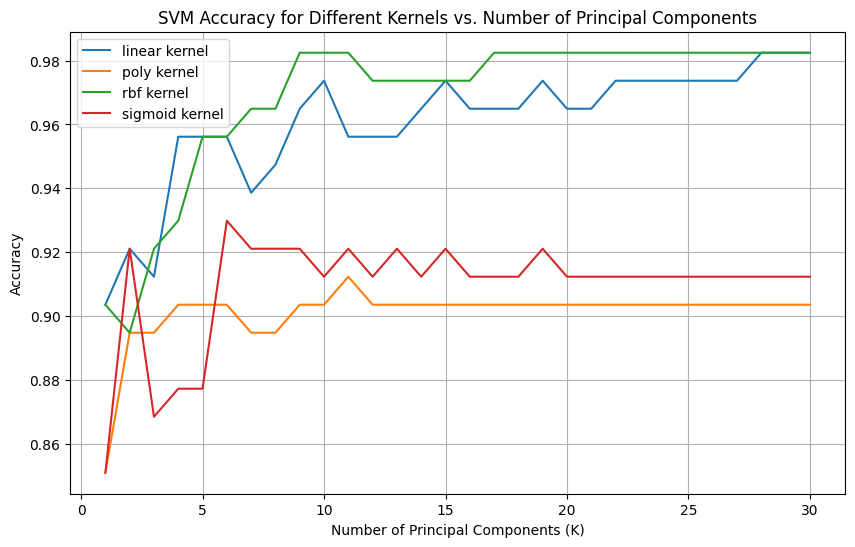

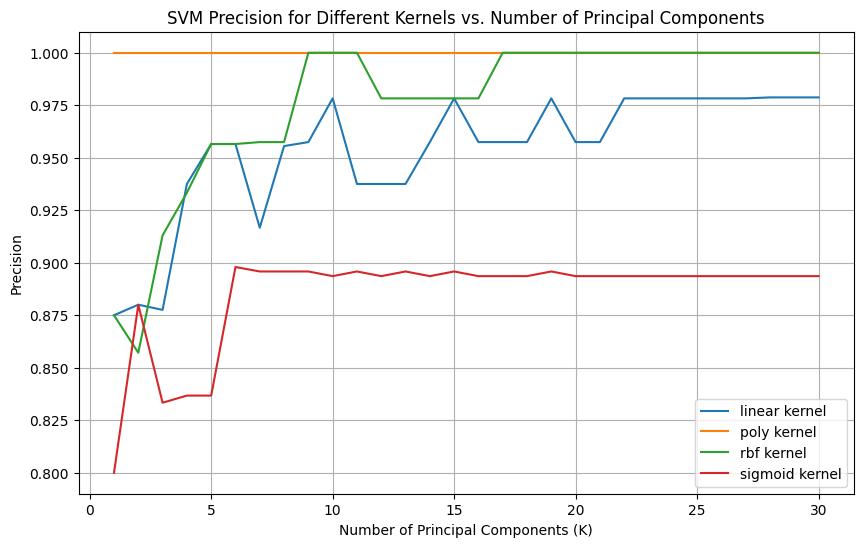

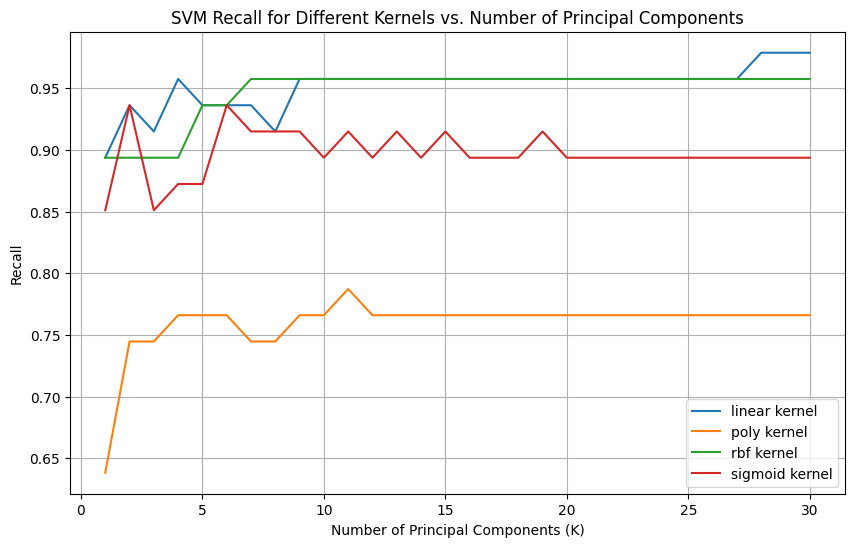

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

# Load the dataset
cancer_df = pd.read_csv('cancer.csv')

# Binary mapping of diagnosis
cancer_df['diagnosis'] = cancer_df['diagnosis'].map({'M': 1, 'B': 0})

# Prepare features and target
Xc = cancer_df.iloc[:, 2:32]
Yc = cancer_df.iloc[:, 1]

# Split the data
Xc_train, Xc_test, Yc_train, Yc_test = train_test_split(Xc, Yc, test_size=0.2, random_state=0)

# Feature scaling
scaler = StandardScaler()
Xc_train = scaler.fit_transform(Xc_train)
Xc_test = scaler.transform(Xc_test)

# Range of principal components to test
K_values = range(1, 31) # Assuming we have 30 features

# Different kernel tricks
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Storing results
results = {kernel: {'accuracy': [], 'precision': [], 'recall': []} for kernel in kernels}

for kernel in kernels:
    for K in K_values:
        # PCA
        pca = PCA(n_components=K)
        Xc_train_pca = pca.fit_transform(Xc_train)
        Xc_test_pca = pca.transform(Xc_test)

        # SVM Classifier
        svm_model = SVC(kernel=kernel)
        svm_model.fit(Xc_train_pca, Yc_train)

        # Predictions
        Yc_pred = svm_model.predict(Xc_test_pca)

        # Metrics
        accuracy = accuracy_score(Yc_test, Yc_pred)
        precision = precision_score(Yc_test, Yc_pred)
        recall = recall_score(Yc_test, Yc_pred)

        # Store results
        results[kernel]['accuracy'].append(accuracy)
        results[kernel]['precision'].append(precision)
        results[kernel]['recall'].append(recall)

# Plotting results
for metric in ['accuracy', 'precision', 'recall']:
    plt.figure(figsize=(10, 6))
    for kernel in kernels:
        plt.plot(K_values, results[kernel][metric], label=f'{kernel} kernel')
    plt.xlabel('Number of Principal Components (K)')
    plt.ylabel(metric.capitalize())
    plt.title(f'SVM {metric.capitalize()} for Different Kernels vs. Number of Principal Components')
    plt.legend()
    plt.grid(True)
    plt.show()



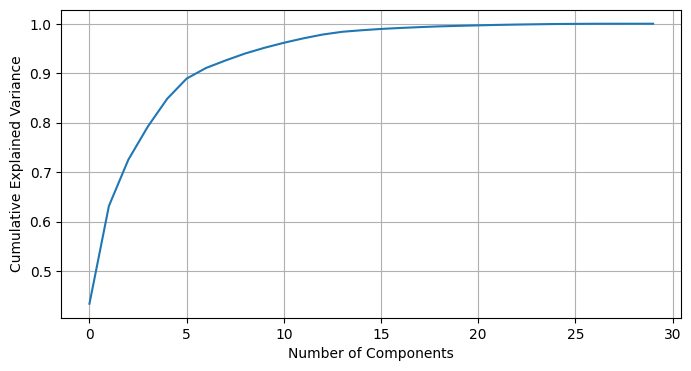

Optimal number of components: 10


In [7]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd

# Load and preprocess data as before

# Split the data
Xc_train, Xc_test, Yc_train, Yc_test = train_test_split(Xc, Yc, test_size=0.2, random_state=0)

# Feature scaling
scaler = StandardScaler()
Xc_train_scaled = scaler.fit_transform(Xc_train)
Xc_test_scaled = scaler.transform(Xc_test)

# Apply PCA
pca = PCA().fit(Xc_train_scaled)

# Plot the cumulative variance explained by the components
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Determine the number of components for desired explained variance (e.g., 95%)
cum_var_exp = np.cumsum(pca.explained_variance_ratio_)
K_optimal = np.where(cum_var_exp >= 0.95)[0][0] + 1

print(f"Optimal number of components: {K_optimal}")

# You can then proceed with training your SVM classifier using K_optimal components.


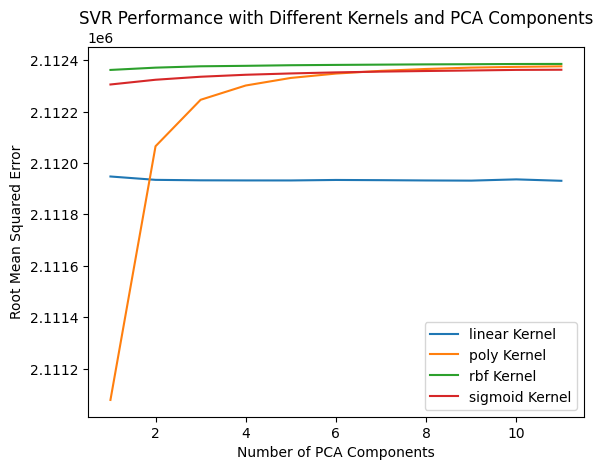

Optimal number of PCA components for linear kernel: 11
Optimal number of PCA components for poly kernel: 1
Optimal number of PCA components for rbf kernel: 1
Optimal number of PCA components for sigmoid kernel: 1


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline

# Load the data
df = pd.read_csv('Housing.csv')

# Preprocess the data
# Assuming the categorical variables are non-numeric and need to be converted
df = pd.get_dummies(df, drop_first=True)

# Selecting features and target variable
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes', 'airconditioning_yes', 'parking', 'prefarea_yes']]
y = df['price']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Different kernels to be tested
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Function to train and evaluate SVR with PCA
def train_evaluate_svr(kernel, n_components):
    pipeline = make_pipeline(PCA(n_components=n_components), SVR(kernel=kernel))
    pipeline.fit(X_train_scaled, y_train)
    predictions = pipeline.predict(X_test_scaled)
    mse = mean_squared_error(y_test, predictions)
    return np.sqrt(mse)

# Determine the optimal number of components
max_components = min(len(X_train_scaled), len(X_train_scaled[0]))
mse_results = {kernel: [] for kernel in kernels}
n_components_range = range(1, max_components + 1)

for n_components in n_components_range:
    for kernel in kernels:
        mse = train_evaluate_svr(kernel, n_components)
        mse_results[kernel].append(mse)

# Plotting the results
for kernel in kernels:
    plt.plot(n_components_range, mse_results[kernel], label=f'{kernel} Kernel')

plt.xlabel('Number of PCA Components')
plt.ylabel('Root Mean Squared Error')
plt.title('SVR Performance with Different Kernels and PCA Components')
plt.legend()
plt.show()

# Identifying the optimal number of components
for kernel in kernels:
    optimal_components = np.argmin(mse_results[kernel]) + 1
    print(f"Optimal number of PCA components for {kernel} kernel: {optimal_components}")
